In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np

In [3]:
bnkdat_df = pd.read_csv("banking_synthetic_data.csv")
bnkdat_df.head()

,CustomerID,Sex,Age,AccountDuration,AccountType,AverageMonthlySpending,InvestmentAccounts,FixedDeposits,MutualFunds,StockInvestments,BondInvestments,BalancedFunds,TaxSavings,TradingAccounts,SpecialtyFunds,CustomerStatus
0,10001,Male,49,10,Checking,894.23,Yes,No,No,No,No,Yes,No,No,No,Active
1,10002,Male,55,4,Savings,827.57,Yes,Yes,Yes,No,Yes,No,No,No,No,Active
2,10003,Female,52,10,Checking,3232.19,Yes,No,Yes,No,No,No,Yes,No,Yes,Churned
3,10004,Male,62,5,Checking,1084.61,Yes,No,No,No,No,No,Yes,No,No,Active
4,10005,Female,72,5,Savings,1188.77,No,No,No,No,No,No,No,No,No,Active


In [4]:
#check missing values
bnkdat_df.isnull().sum()
# no missing values

CustomerID                0
Sex                       0
Age                       0
AccountDuration           0
AccountType               0
AverageMonthlySpending    0
InvestmentAccounts        0
FixedDeposits             0
MutualFunds               0
StockInvestments          0
BondInvestments           0
BalancedFunds             0
TaxSavings                0
TradingAccounts           0
SpecialtyFunds            0
CustomerStatus            0
dtype: int64

In [5]:
all_mean_num_cols = bnkdat_df.select_dtypes(include='number').mean(skipna=False)
all_mean_num_cols

CustomerID                10425.500000
Age                          45.930588
AccountDuration               6.080000
AverageMonthlySpending     2249.351847
dtype: float64

In [6]:
# Numeric columns
#handle missing values.
bnkdat_df.fillna(all_mean_num_cols, inplace=True)
bnkdat_df

,CustomerID,Sex,Age,AccountDuration,AccountType,AverageMonthlySpending,InvestmentAccounts,FixedDeposits,MutualFunds,StockInvestments,BondInvestments,BalancedFunds,TaxSavings,TradingAccounts,SpecialtyFunds,CustomerStatus
0,10001,Male,49,10,Checking,894.23,Yes,No,No,No,No,Yes,No,No,No,Active
1,10002,Male,55,4,Savings,827.57,Yes,Yes,Yes,No,Yes,No,No,No,No,Active
2,10003,Female,52,10,Checking,3232.19,Yes,No,Yes,No,No,No,Yes,No,Yes,Churned
3,10004,Male,62,5,Checking,1084.61,Yes,No,No,No,No,No,Yes,No,No,Active
4,10005,Female,72,5,Savings,1188.77,No,No,No,No,No,No,No,No,No,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,10846,Female,21,3,Checking,3186.52,No,No,No,No,No,No,No,No,No,Active
846,10847,Female,29,4,Savings,912.74,No,No,No,No,No,No,No,No,No,Active
847,10848,Female,18,7,Savings,1132.39,No,No,No,No,No,No,No,No,No,Active
848,10849,Male,50,6,Savings,1193.58,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Active


In [7]:
bnkdat_df.select_dtypes(exclude='number') #only categorical columns

,Sex,AccountType,InvestmentAccounts,FixedDeposits,MutualFunds,StockInvestments,BondInvestments,BalancedFunds,TaxSavings,TradingAccounts,SpecialtyFunds,CustomerStatus
0,Male,Checking,Yes,No,No,No,No,Yes,No,No,No,Active
1,Male,Savings,Yes,Yes,Yes,No,Yes,No,No,No,No,Active
2,Female,Checking,Yes,No,Yes,No,No,No,Yes,No,Yes,Churned
3,Male,Checking,Yes,No,No,No,No,No,Yes,No,No,Active
4,Female,Savings,No,No,No,No,No,No,No,No,No,Active
...,...,...,...,...,...,...,...,...,...,...,...,...
845,Female,Checking,No,No,No,No,No,No,No,No,No,Active
846,Female,Savings,No,No,No,No,No,No,No,No,No,Active
847,Female,Savings,No,No,No,No,No,No,No,No,No,Active
848,Male,Savings,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Active


In [8]:
all_categorical_cols = bnkdat_df.select_dtypes(exclude='number').mode() # Categorical columns
all_categorical_cols

,Sex,AccountType,InvestmentAccounts,FixedDeposits,MutualFunds,StockInvestments,BondInvestments,BalancedFunds,TaxSavings,TradingAccounts,SpecialtyFunds,CustomerStatus
0,Female,Savings,Yes,No,No,No,No,No,No,No,No,Active


In [9]:
# Numeric columns
# Task 1: Data Cleaning and Preprocessing
#handle missing values.
bnkdat_df.fillna(all_categorical_cols, inplace=True)
bnkdat_df

,CustomerID,Sex,Age,AccountDuration,AccountType,AverageMonthlySpending,InvestmentAccounts,FixedDeposits,MutualFunds,StockInvestments,BondInvestments,BalancedFunds,TaxSavings,TradingAccounts,SpecialtyFunds,CustomerStatus
0,10001,Male,49,10,Checking,894.23,Yes,No,No,No,No,Yes,No,No,No,Active
1,10002,Male,55,4,Savings,827.57,Yes,Yes,Yes,No,Yes,No,No,No,No,Active
2,10003,Female,52,10,Checking,3232.19,Yes,No,Yes,No,No,No,Yes,No,Yes,Churned
3,10004,Male,62,5,Checking,1084.61,Yes,No,No,No,No,No,Yes,No,No,Active
4,10005,Female,72,5,Savings,1188.77,No,No,No,No,No,No,No,No,No,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,10846,Female,21,3,Checking,3186.52,No,No,No,No,No,No,No,No,No,Active
846,10847,Female,29,4,Savings,912.74,No,No,No,No,No,No,No,No,No,Active
847,10848,Female,18,7,Savings,1132.39,No,No,No,No,No,No,No,No,No,Active
848,10849,Male,50,6,Savings,1193.58,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Active


In [10]:
# 2. Convert Categorical Variables into numerical values.
bnkdat_df['Sex'] = LabelEncoder().fit_transform(bnkdat_df['Sex'])  # Male=1, Female=0
bnkdat_df['CustomerStatus'] = LabelEncoder().fit_transform(bnkdat_df['CustomerStatus'])  # Active=0, Inactive=1
bnkdat_df['AccountType'] = LabelEncoder().fit_transform(bnkdat_df['AccountType']) 
bnkdat_df

,CustomerID,Sex,Age,AccountDuration,AccountType,AverageMonthlySpending,InvestmentAccounts,FixedDeposits,MutualFunds,StockInvestments,BondInvestments,BalancedFunds,TaxSavings,TradingAccounts,SpecialtyFunds,CustomerStatus
0,10001,1,49,10,0,894.23,Yes,No,No,No,No,Yes,No,No,No,0
1,10002,1,55,4,4,827.57,Yes,Yes,Yes,No,Yes,No,No,No,No,0
2,10003,0,52,10,0,3232.19,Yes,No,Yes,No,No,No,Yes,No,Yes,1
3,10004,1,62,5,0,1084.61,Yes,No,No,No,No,No,Yes,No,No,0
4,10005,0,72,5,4,1188.77,No,No,No,No,No,No,No,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,10846,0,21,3,0,3186.52,No,No,No,No,No,No,No,No,No,0
846,10847,0,29,4,4,912.74,No,No,No,No,No,No,No,No,No,0
847,10848,0,18,7,4,1132.39,No,No,No,No,No,No,No,No,No,0
848,10849,1,50,6,4,1193.58,Yes,Yes,Yes,Yes,Yes,No,No,No,No,0


In [11]:
# 3. Normalize Numerical Features . performing feature scaling on selected numeric columns
scaler = StandardScaler()
bnkdat_df[['Age', 'AccountDuration', 'AverageMonthlySpending']] = scaler.fit_transform(
    bnkdat_df[['Age', 'AccountDuration', 'AverageMonthlySpending']])

bnkdat_df

,CustomerID,Sex,Age,AccountDuration,AccountType,AverageMonthlySpending,InvestmentAccounts,FixedDeposits,MutualFunds,StockInvestments,BondInvestments,BalancedFunds,TaxSavings,TradingAccounts,SpecialtyFunds,CustomerStatus
0,10001,1,0.184482,1.761269,0,-0.895736,Yes,No,No,No,No,Yes,No,No,No,0
1,10002,1,0.545103,-0.934551,4,-0.939798,Yes,Yes,Yes,No,Yes,No,No,No,No,0
2,10003,0,0.364793,1.761269,0,0.649656,Yes,No,Yes,No,No,No,Yes,No,Yes,1
3,10004,1,0.965827,-0.485247,0,-0.769895,Yes,No,No,No,No,No,Yes,No,No,0
4,10005,0,1.566862,-0.485247,4,-0.701045,No,No,No,No,No,No,No,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,10846,0,-1.498415,-1.383854,0,0.619469,No,No,No,No,No,No,No,No,No,0
846,10847,0,-1.017587,-0.934551,4,-0.883501,No,No,No,No,No,No,No,No,No,0
847,10848,0,-1.678725,0.413359,4,-0.738312,No,No,No,No,No,No,No,No,No,0
848,10849,1,0.244586,-0.035944,4,-0.697866,Yes,Yes,Yes,Yes,Yes,No,No,No,No,0


StandardScaler Formula
For each value x in a column:
z = \frac{x - \mu}{\sigma}
Where:
- \mu = mean of the column
- \sigma = standard deviation of the column
- z = standardized value


In [12]:
bnkdat_df.head()

,CustomerID,Sex,Age,AccountDuration,AccountType,AverageMonthlySpending,InvestmentAccounts,FixedDeposits,MutualFunds,StockInvestments,BondInvestments,BalancedFunds,TaxSavings,TradingAccounts,SpecialtyFunds,CustomerStatus
0,10001,1,0.184482,1.761269,0,-0.895736,Yes,No,No,No,No,Yes,No,No,No,0
1,10002,1,0.545103,-0.934551,4,-0.939798,Yes,Yes,Yes,No,Yes,No,No,No,No,0
2,10003,0,0.364793,1.761269,0,0.649656,Yes,No,Yes,No,No,No,Yes,No,Yes,1
3,10004,1,0.965827,-0.485247,0,-0.769895,Yes,No,No,No,No,No,Yes,No,No,0
4,10005,0,1.566862,-0.485247,4,-0.701045,No,No,No,No,No,No,No,No,No,0


In [13]:
bnkdat_df['InvestmentAccounts'] = LabelEncoder().fit_transform(bnkdat_df['InvestmentAccounts'])  # Male=1, Female=0
bnkdat_df['FixedDeposits'] = LabelEncoder().fit_transform(bnkdat_df['FixedDeposits'])  # Active=0, Inactive=1
bnkdat_df['MutualFunds'] = LabelEncoder().fit_transform(bnkdat_df['MutualFunds']) 
bnkdat_df['StockInvestments'] = LabelEncoder().fit_transform(bnkdat_df['StockInvestments']) 
bnkdat_df['BondInvestments'] = LabelEncoder().fit_transform(bnkdat_df['BondInvestments']) 
bnkdat_df['TaxSavings'] = LabelEncoder().fit_transform(bnkdat_df['TaxSavings']) 
bnkdat_df['TradingAccounts'] = LabelEncoder().fit_transform(bnkdat_df['TradingAccounts']) 
bnkdat_df['SpecialtyFunds'] = LabelEncoder().fit_transform(bnkdat_df['SpecialtyFunds'])
bnkdat_df['BalancedFunds'] = LabelEncoder().fit_transform(bnkdat_df['BalancedFunds'])
bnkdat_df 

,CustomerID,Sex,Age,AccountDuration,AccountType,AverageMonthlySpending,InvestmentAccounts,FixedDeposits,MutualFunds,StockInvestments,BondInvestments,BalancedFunds,TaxSavings,TradingAccounts,SpecialtyFunds,CustomerStatus
0,10001,1,0.184482,1.761269,0,-0.895736,1,0,0,0,0,1,0,0,0,0
1,10002,1,0.545103,-0.934551,4,-0.939798,1,1,1,0,1,0,0,0,0,0
2,10003,0,0.364793,1.761269,0,0.649656,1,0,1,0,0,0,1,0,1,1
3,10004,1,0.965827,-0.485247,0,-0.769895,1,0,0,0,0,0,1,0,0,0
4,10005,0,1.566862,-0.485247,4,-0.701045,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,10846,0,-1.498415,-1.383854,0,0.619469,0,0,0,0,0,0,0,0,0,0
846,10847,0,-1.017587,-0.934551,4,-0.883501,0,0,0,0,0,0,0,0,0,0
847,10848,0,-1.678725,0.413359,4,-0.738312,0,0,0,0,0,0,0,0,0,0
848,10849,1,0.244586,-0.035944,4,-0.697866,1,1,1,1,1,0,0,0,0,0


In [14]:
bnkdat_df

,CustomerID,Sex,Age,AccountDuration,AccountType,AverageMonthlySpending,InvestmentAccounts,FixedDeposits,MutualFunds,StockInvestments,BondInvestments,BalancedFunds,TaxSavings,TradingAccounts,SpecialtyFunds,CustomerStatus
0,10001,1,0.184482,1.761269,0,-0.895736,1,0,0,0,0,1,0,0,0,0
1,10002,1,0.545103,-0.934551,4,-0.939798,1,1,1,0,1,0,0,0,0,0
2,10003,0,0.364793,1.761269,0,0.649656,1,0,1,0,0,0,1,0,1,1
3,10004,1,0.965827,-0.485247,0,-0.769895,1,0,0,0,0,0,1,0,0,0
4,10005,0,1.566862,-0.485247,4,-0.701045,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,10846,0,-1.498415,-1.383854,0,0.619469,0,0,0,0,0,0,0,0,0,0
846,10847,0,-1.017587,-0.934551,4,-0.883501,0,0,0,0,0,0,0,0,0,0
847,10848,0,-1.678725,0.413359,4,-0.738312,0,0,0,0,0,0,0,0,0,0
848,10849,1,0.244586,-0.035944,4,-0.697866,1,1,1,1,1,0,0,0,0,0


In [15]:
# 4. Feature Transformation
bnkdat_df['TotalInvestments'] = bnkdat_df[['InvestmentAccounts', 'FixedDeposits', 'MutualFunds', 'StockInvestments',
                             'BondInvestments', 'BalancedFunds', 'TaxSavings',
                             'TradingAccounts', 'SpecialtyFunds']].sum(axis=1)
bnkdat_df['TotalInvestments'] 
# 4. Feature Transformation

0      2
1      4
2      4
3      2
4      0
      ..
845    0
846    0
847    0
848    5
849    2
Name: TotalInvestments, Length: 850, dtype: int64

In [16]:
# Task 2: Feature Engineering

# 1. Create Interaction Features
bnkdat_df['Age_AvgMonthlySpending'] = bnkdat_df['Age'] * bnkdat_df['AverageMonthlySpending']


In [17]:
# 2. Generate Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(bnkdat_df[['AccountType']])
poly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(['AccountType']))
bnkdat_df = pd.concat([bnkdat_df, poly_df], axis=1)

bnkdat_df
#generate column AccountType^2

,CustomerID,Sex,Age,AccountDuration,AccountType,AverageMonthlySpending,InvestmentAccounts,FixedDeposits,MutualFunds,StockInvestments,BondInvestments,BalancedFunds,TaxSavings,TradingAccounts,SpecialtyFunds,CustomerStatus,TotalInvestments,Age_AvgMonthlySpending,AccountType,AccountType^2
0,10001,1,0.184482,1.761269,0,-0.895736,1,0,0,0,0,1,0,0,0,0,2,-0.165247,0.0,0.0
1,10002,1,0.545103,-0.934551,4,-0.939798,1,1,1,0,1,0,0,0,0,0,4,-0.512287,4.0,16.0
2,10003,0,0.364793,1.761269,0,0.649656,1,0,1,0,0,0,1,0,1,1,4,0.236990,0.0,0.0
3,10004,1,0.965827,-0.485247,0,-0.769895,1,0,0,0,0,0,1,0,0,0,2,-0.743585,0.0,0.0
4,10005,0,1.566862,-0.485247,4,-0.701045,0,0,0,0,0,0,0,0,0,0,0,-1.098441,4.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,10846,0,-1.498415,-1.383854,0,0.619469,0,0,0,0,0,0,0,0,0,0,0,-0.928221,0.0,0.0
846,10847,0,-1.017587,-0.934551,4,-0.883501,0,0,0,0,0,0,0,0,0,0,0,0.899039,4.0,16.0
847,10848,0,-1.678725,0.413359,4,-0.738312,0,0,0,0,0,0,0,0,0,0,0,1.239423,4.0,16.0
848,10849,1,0.244586,-0.035944,4,-0.697866,1,1,1,1,1,0,0,0,0,0,5,-0.170688,4.0,16.0


In [18]:
# 3. Feature Binning - feature binning — a technique to convert continuous numeric data into categorical buckets

bnkdat_df['SpendingCategory'] = pd.cut(bnkdat_df['AverageMonthlySpending'], bins=[-np.inf, -0.5, 0.5, np.inf],
                                labels=['Low', 'Medium', 'High'])

🔹 pd.cut(...)
- This function bins continuous values into discrete intervals.
- It’s useful for creating categories like “Low”, “Medium”, “High” from a numeric column.
🔹 bnkdat_df['AverageMonthlySpending']
- The numeric column being binned — likely already standardized (mean = 0, std = 1).
🔹 bins=[-np.inf, -0.5, 0.5, np.inf]
np.inf - positive infinity
-np.inf - negative infinity
- Defines the edges of the bins:
- -np.inf to -0.5 → Low
- -0.5 to 0.5 → Medium
- 0.5 to np.inf → High
These thresholds assume the data is standardized. So values near 0 are average, below -0.5 are low, and above 0.5 are high.

🔹 labels=['Low', 'Medium', 'High']
- Assigns category names to each bin.
🔹 Assignment bnkdat_df['SpendingCategory'] = ...
- Creates a new column with the binned labels.


In [19]:
bnkdat_df

,CustomerID,Sex,Age,AccountDuration,AccountType,AverageMonthlySpending,InvestmentAccounts,FixedDeposits,MutualFunds,StockInvestments,...,BalancedFunds,TaxSavings,TradingAccounts,SpecialtyFunds,CustomerStatus,TotalInvestments,Age_AvgMonthlySpending,AccountType,AccountType^2,SpendingCategory
0,10001,1,0.184482,1.761269,0,-0.895736,1,0,0,0,...,1,0,0,0,0,2,-0.165247,0.0,0.0,Low
1,10002,1,0.545103,-0.934551,4,-0.939798,1,1,1,0,...,0,0,0,0,0,4,-0.512287,4.0,16.0,Low
2,10003,0,0.364793,1.761269,0,0.649656,1,0,1,0,...,0,1,0,1,1,4,0.236990,0.0,0.0,High
3,10004,1,0.965827,-0.485247,0,-0.769895,1,0,0,0,...,0,1,0,0,0,2,-0.743585,0.0,0.0,Low
4,10005,0,1.566862,-0.485247,4,-0.701045,0,0,0,0,...,0,0,0,0,0,0,-1.098441,4.0,16.0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,10846,0,-1.498415,-1.383854,0,0.619469,0,0,0,0,...,0,0,0,0,0,0,-0.928221,0.0,0.0,High
846,10847,0,-1.017587,-0.934551,4,-0.883501,0,0,0,0,...,0,0,0,0,0,0,0.899039,4.0,16.0,Low
847,10848,0,-1.678725,0.413359,4,-0.738312,0,0,0,0,...,0,0,0,0,0,0,1.239423,4.0,16.0,Low
848,10849,1,0.244586,-0.035944,4,-0.697866,1,1,1,1,...,0,0,0,0,0,5,-0.170688,4.0,16.0,Low


In [20]:
bnkdat_df[['Age', 'AccountDuration', 'AverageMonthlySpending', 'InvestmentAccounts',
                                   'FixedDeposits', 'MutualFunds', 'StockInvestments', 'BondInvestments',
                                   'BalancedFunds', 'TaxSavings', 'TradingAccounts',
                                   'SpecialtyFunds']]

,Age,AccountDuration,AverageMonthlySpending,InvestmentAccounts,FixedDeposits,MutualFunds,StockInvestments,BondInvestments,BalancedFunds,TaxSavings,TradingAccounts,SpecialtyFunds
0,0.184482,1.761269,-0.895736,1,0,0,0,0,1,0,0,0
1,0.545103,-0.934551,-0.939798,1,1,1,0,1,0,0,0,0
2,0.364793,1.761269,0.649656,1,0,1,0,0,0,1,0,1
3,0.965827,-0.485247,-0.769895,1,0,0,0,0,0,1,0,0
4,1.566862,-0.485247,-0.701045,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
845,-1.498415,-1.383854,0.619469,0,0,0,0,0,0,0,0,0
846,-1.017587,-0.934551,-0.883501,0,0,0,0,0,0,0,0,0
847,-1.678725,0.413359,-0.738312,0,0,0,0,0,0,0,0,0
848,0.244586,-0.035944,-0.697866,1,1,1,1,1,0,0,0,0


In [21]:
# Task 3: Dimensionality Reduction: Number of components will depend on result. This is just an example

# Apply PCA
pca = PCA(n_components=2)
pca

,n_components,2
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [22]:
pca_result = pca.fit_transform(bnkdat_df[['Age', 'AccountDuration', 'AverageMonthlySpending', 'InvestmentAccounts',
                                   'FixedDeposits', 'MutualFunds', 'StockInvestments', 'BondInvestments',
                                   'BalancedFunds', 'TaxSavings', 'TradingAccounts',
                                   'SpecialtyFunds']])
pca_result

array([[ 0.79144776,  0.12250921],
       [-0.36227138,  1.38181299],
       [ 1.74730301, -0.73403334],
       ...,
       [-1.3696695 , -0.87266484],
       [ 0.08049819,  0.71817483],
       [ 0.19644254, -0.03517995]], shape=(850, 2))

In [23]:
df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
df_pca

,PC1,PC2
0,0.791448,0.122509
1,-0.362271,1.381813
2,1.747303,-0.734033
3,0.103823,1.326551
4,0.238109,1.638274
...,...,...
845,-1.691098,-1.004583
846,-1.769125,0.129613
847,-1.369670,-0.872665
848,0.080498,0.718175


Principal Component Analysis (PCA) — a powerful technique for simplifying high-dimensional data while preserving its structure
- You're creating a PCA object that will reduce your data to 2 principal components.
- Principal Component is like a summary of the most important patterns or variations in your data.
- Principal Components are new axes or directions in your data that capture the biggest differrences between your data points.
- PC1 captures the largest possible variations across all the data points.
- PCs are ranked and ortogonal(independent) of each other.
- These components are linear combinations of the original features that capture the maximum variance.
- You're applying PCA to a subset of columns:
  'Age', 'AccountDuration', 'AverageMonthlySpending', and various investment-related features.

- fit_transform does two things:
  - Fit: Learns the directions (principal components) that capture the most variance.
  - Transform: Projects the original data onto these directions.

  Think of it like rotating and flattening a cloud of points in 12D space down to 2D, while keeping the most meaningful structure

- You now have a new DataFrame with just two columns:
  - PC1: First principal component (captures most variance)
  - PC2: Second principal component (captures next most)

🧠 Analogy: PCA as a Camera Angle
Imagine you're photographing a sculpture:
- From the front, you see the most detail (PC1).
- From the side, you get a different but still meaningful view (PC2).
- You ignore other angles that add little new information.

Variance in PCA (Principal Component Analysis) refers to the amount of information or data variability captured by each principal component.
Principal Components (PCs): These are new, uncorrelated variables that are linear combinations of the original features. They are ordered so that the first principal component captures the most variance, the second captures the next most, and so on.
The variance associated with each principal component indicates how much of the original data's variability is retained when the data is projected onto that component.
A high variance in a principal component means that this component accounts for a large portion of the dataset's overall variability.
By examining the variance explained by each principal component (often expressed as a percentage), we can understand which components are most important and determine how many components to keep for analysis or dimensionality reduction.
Mathematically, variance in PCA is related to the eigenvalues of the covariance matrix of the data. Specifically, each principal component's variance is associated with its eigenvalue:

Variance explained by PC
i
=
λ
i
Variance explained by PC 
i
​
 =λ 
i
​
 

where 
λ
i
λ 
i
​
  is the eigenvalue for the 
i
t
h
i 
th
  principal component.

In essence, variance in PCA measures how much of the original data's diversity or spread is captured by each principal component, guiding how we interpret and reduce the data effectively.

Eigenvector: The special direction that remains unchanged in direction after transformation.
Eigenvalue: The amount by which the eigenvector is scaled.

where do we use PCA's results and how ? tell in layman terms

Great question! Let's break down PCA, or Principal Component Analysis, in simple terms and then see where and how people use its results.

What is PCA in simple words?
Think of PCA as a way to simplify complex data. Imagine you have a big set of data with many measurements (like height, weight, age, income, etc.). PCA helps to find the most important "patterns" or "directions" in that data, reducing the many measurements into a smaller set of new, combined measurements called principal components. These new components still keep most of the important information from the original data but are easier to work with.

Where do we use PCA's results?
People use PCA results in many fields, especially when dealing with lots of data. Here are some common uses in layman terms:

Data Visualization:

When data has many measurements, it's hard to see patterns. PCA reduces data to 2 or 3 main parts, so you can plot it on a simple graph and see groups, trends, or outliers.
Feature Reduction for Machine Learning:

Instead of using many features or measurements to teach a computer to recognize patterns (like predicting if a tumor is malignant), PCA reduces the number of features. This makes the computer learn faster and sometimes more accurately.
Image Compression:

In digital images, PCA can help compress the image by keeping only the main parts, reducing file size without losing much quality.
Identifying Important Variables:

PCA shows which original measurements matter most. For example, in a health study, it might reveal that age and weight are the most influential factors among many.
Noise Reduction:

It helps to remove “random noise” or irrelevant details from data, leaving only the meaningful patterns.
How do people use PCA results?
Summarize Data: They create a simple summary of complex data, making it easier to understand and interpret.
Find patterns: They look at the main components to discover patterns or groups.
Build models: They feed these simplified features into algorithms for better predictions.
Visualize: They plot the main components on graphs to see how data points relate to each other.

In short, PCA helps make sense of complex data, reduces it to its most important parts, and allows us to analyze and visualize it more easily.

In [24]:
# Save the cleaned dataset and reports
bnkdat_df.to_csv('cleaned_bank_data.csv', index=False)
df_pca.to_csv('pca_results_bank_data.csv', index=False)

print("Data cleaning, feature engineering, and dimensionality reduction completed. Results saved.")

Data cleaning, feature engineering, and dimensionality reduction completed. Results saved.


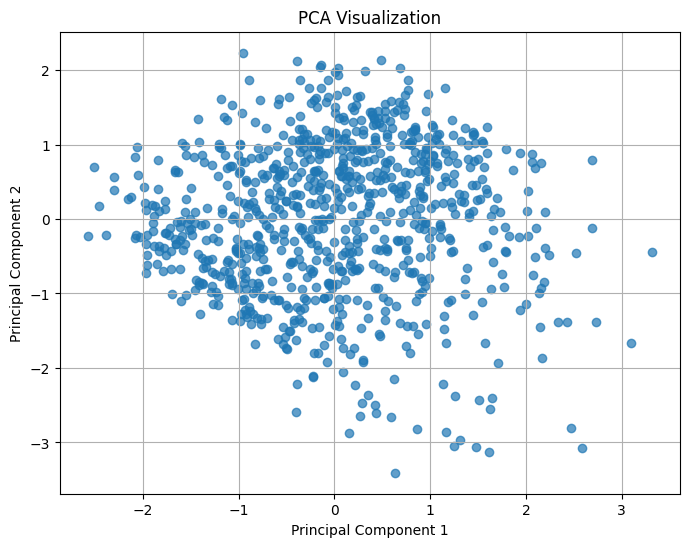

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.grid(True)
plt.show()


In [29]:
bnkdat_df[['Age', 'AccountDuration', 'AverageMonthlySpending', 'InvestmentAccounts',
                                   'FixedDeposits', 'MutualFunds', 'StockInvestments', 'BondInvestments',
                                   'BalancedFunds', 'TaxSavings', 'TradingAccounts',
                                   'SpecialtyFunds']]

,Age,AccountDuration,AverageMonthlySpending,InvestmentAccounts,FixedDeposits,MutualFunds,StockInvestments,BondInvestments,BalancedFunds,TaxSavings,TradingAccounts,SpecialtyFunds
0,0.184482,1.761269,-0.895736,1,0,0,0,0,1,0,0,0
1,0.545103,-0.934551,-0.939798,1,1,1,0,1,0,0,0,0
2,0.364793,1.761269,0.649656,1,0,1,0,0,0,1,0,1
3,0.965827,-0.485247,-0.769895,1,0,0,0,0,0,1,0,0
4,1.566862,-0.485247,-0.701045,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
845,-1.498415,-1.383854,0.619469,0,0,0,0,0,0,0,0,0
846,-1.017587,-0.934551,-0.883501,0,0,0,0,0,0,0,0,0
847,-1.678725,0.413359,-0.738312,0,0,0,0,0,0,0,0,0
848,0.244586,-0.035944,-0.697866,1,1,1,1,1,0,0,0,0


t-SNE is a technique that reduces high-dimensional data to a low-dimensional graph while preserving the original clustering. It calculates similarity scores between data points and iteratively adjusts their positions to match the original structure.
The process involves calculating unscaled similarity for points, then scaling them to sum up to 1, using normal and t-distributions to determine similarity scores for clustering analysis.
The t-distribution is used to calculate unscaled similarity scores and then scale them, helping to move points gradually to align matrices for better comparison and visualization in data analysis.

In [28]:
# Apply t-SNE
tsne = TSNE(n_components=2)
tsne

,n_components,2
,perplexity,30.0
,early_exaggeration,12.0
,learning_rate,'auto'
,max_iter,1000
,n_iter_without_progress,300
,min_grad_norm,1e-07
,metric,'euclidean'
,metric_params,None
,init,'pca'
,verbose,0


In [30]:
tsne_results = tsne.fit_transform(bnkdat_df[['Age', 'AccountDuration', 'AverageMonthlySpending', 'InvestmentAccounts',
                                   'FixedDeposits', 'MutualFunds', 'StockInvestments', 'BondInvestments',
                                   'BalancedFunds', 'TaxSavings', 'TradingAccounts',
                                   'SpecialtyFunds']])

tsne_results

array([[ -4.6944666,  27.261353 ],
       [  9.123826 ,   4.025832 ],
       [  5.4283853,  23.303928 ],
       ...,
       [-32.15471  ,  -3.2616258],
       [ 10.24965  ,   1.7096527],
       [  4.4146233,   3.4149165]], shape=(850, 2), dtype=float32)

In [31]:
tsne_df = pd.DataFrame(data=tsne_results, columns=['tsne-2d-one', 'tsne-2d-two'])
tsne_df

,tsne-2d-one,tsne-2d-two
0,-4.694467,27.261353
1,9.123826,4.025832
2,5.428385,23.303928
3,18.339201,8.843487
4,-0.365221,-21.100111
...,...,...
845,-19.315413,-14.733318
846,-25.962635,-19.918648
847,-32.154709,-3.261626
848,10.249650,1.709653


In [32]:
tsne_df['CustomerStatus'] = bnkdat_df['CustomerStatus']
tsne_df

,tsne-2d-one,tsne-2d-two,CustomerStatus
0,-4.694467,27.261353,0
1,9.123826,4.025832,0
2,5.428385,23.303928,1
3,18.339201,8.843487,0
4,-0.365221,-21.100111,0
...,...,...,...
845,-19.315413,-14.733318,0
846,-25.962635,-19.918648,0
847,-32.154709,-3.261626,0
848,10.249650,1.709653,0


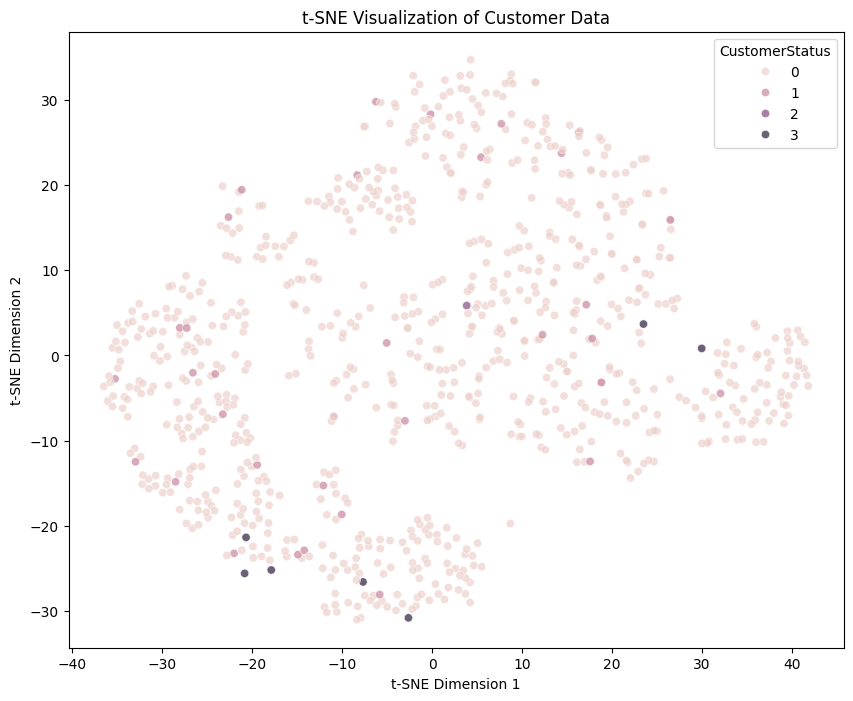

In [34]:
# Plot the t-SNE results
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='tsne-2d-one', y='tsne-2d-two',
    hue='CustomerStatus',
    data=tsne_df,
    legend='full',
    alpha=0.7
)

plt.title('t-SNE Visualization of Customer Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.savefig('tsne_visualization.png')

tsne_df.to_csv('tsne_results_bank_data.csv', index=False)